# $C_3$ and $C_6$ Coefficients

In [ ]:
%pip install -q matplotlib numpy pairinteraction

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction as pi
from pairinteraction import perturbative

In [2]:
if pi.Database.get_global_database() is None:
    pi.Database.initialize_global_database(download_missing=True)

## Example to calculate the angular dependence of the $C_3$ coefficient

In [3]:
ket1 = pi.KetAtom("Rb", n=61, l=0, j=0.5, m=0.5)
ket2 = pi.KetAtom("Rb", n=62, l=1, j=1.5, m=0.5)

c3_obj = perturbative.C3(ket1, ket2)

c3_obj.set_diamagnetism_enabled(False)
c3_obj.set_magnetic_field([0, 0, 20], "gauss")

c3_obj.set_minimum_number_of_ket_pairs(2_000)
c3_obj.set_interaction_order(3);

In [4]:
c3_coeffs = []
thetas = np.linspace(0, np.pi, 20)
for theta in thetas:
    c3_obj.set_angle(theta, unit="radian")
    c3_coeffs.append(c3_obj.get(unit="planck_constant * GHz * micrometer^3"))

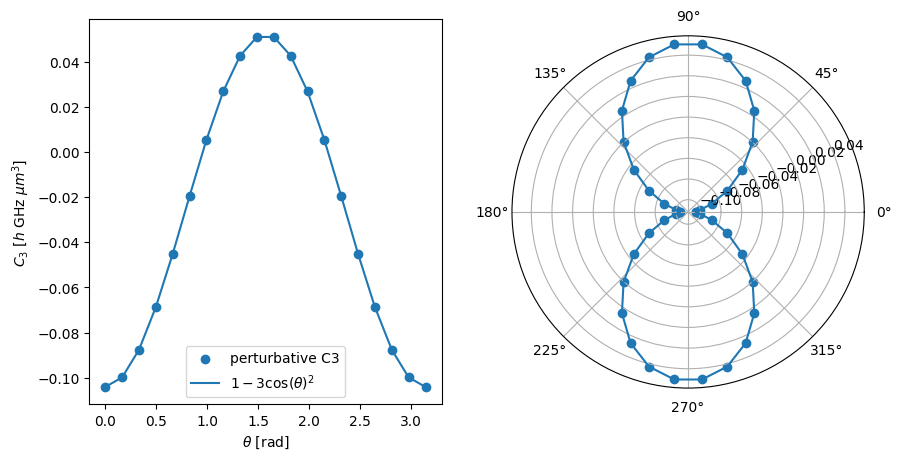

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(thetas, c3_coeffs, label="perturbative C3")
axs[0].plot(
    thetas,
    -0.5 * c3_coeffs[0] * (1 - 3 * np.cos(thetas) ** 2),
    label=r"$1-3\cos(\theta)^2$",
)
axs[0].legend()
axs[0].set_xlabel(r"$\theta$ [rad]")
axs[0].set_ylabel(r"$C_3$ [$h$ GHz $\mu m^3$]")

axs[1].remove()
axs[1] = fig.add_subplot(1, 2, 2, projection="polar")
axs[1].scatter(
    np.append(thetas, thetas + np.pi),
    np.append(c3_coeffs, c3_coeffs),
)
axs[1].plot(
    np.append(thetas, thetas + np.pi),
    -0.5 * c3_coeffs[0] * (1 - 3 * np.cos(np.append(thetas, thetas + np.pi)) ** 2),
)

plt.show()

## Example to calculate the angular dependence of the $C_6$ coefficient

In [6]:
ket = pi.KetAtom("Rb", n=61, l=0, j=0.5, m=0.5)
c6_obj = perturbative.C6(ket, ket)

c6_obj.set_diamagnetism_enabled(False)
c6_obj.set_magnetic_field([0, 0, 20], "gauss")
c6_obj.set_minimum_number_of_ket_pairs(2_000)
c6_obj.set_interaction_order(3);

In [7]:
c6_coeffs = []
thetas = np.linspace(0, np.pi, 20)
for theta in thetas:
    c6_obj.set_angle(theta, unit="radian")
    c6_coeffs.append(c6_obj.get(unit="planck_constant * GHz * micrometer^6"))

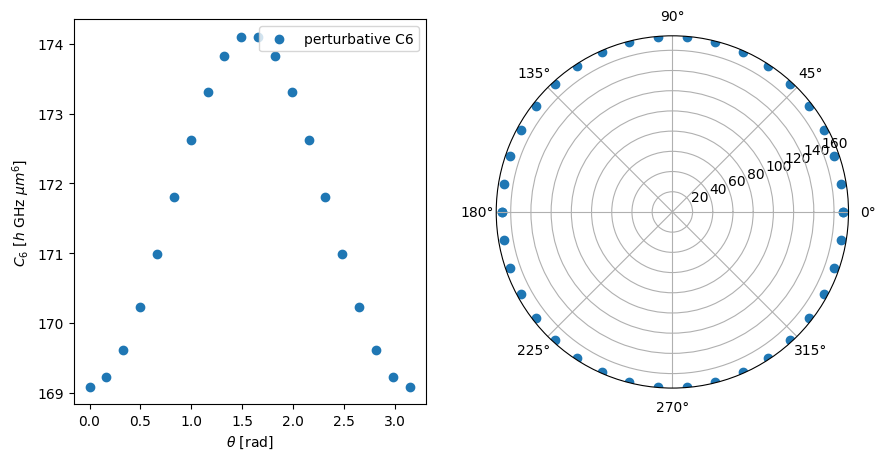

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(thetas, c6_coeffs, label="perturbative C6")
axs[0].legend()
axs[0].set_xlabel(r"$\theta$ [rad]")
axs[0].set_ylabel(r"$C_6$ [$h$ GHz $\mu m^6$]")

axs[1].remove()
axs[1] = fig.add_subplot(1, 2, 2, projection="polar")
axs[1].scatter(
    np.append(thetas, thetas + np.pi),
    np.append(c6_coeffs, c6_coeffs),
)

plt.show()